In this notebook, I explored coherence at different polarizations

In [9]:
import rasterio as rio
import rioxarray as rxr
import numpy as np
import matplotlib.pyplot as plt
import earthpy as et
import os
import glob
import pandas as pd

In [10]:
#set path
print('working directory:', os.getcwd()) #print current working directory

#set the absolute path for the data
data_path = '/SNOWDATA/Nah/lowman/tiffs/'
print('data directory:', data_path)


working directory: /home/naheemadebisi/snow-analytics/lowman
data directory: /SNOWDATA/Nah/lowman/tiffs/


In [12]:
# get list of all coherence files for a scene in the data folder
coherence_quadpol = glob.glob(data_path+'*lowman_23205_21004-003_21008-000_0007d_s01_L090*_01.cor*.tiff')
coherence_quadpol


['/SNOWDATA/Nah/lowman/tiffs/lowman_23205_21004-003_21008-000_0007d_s01_L090HH_01.cor.grd.tiff',
 '/SNOWDATA/Nah/lowman/tiffs/lowman_23205_21004-003_21008-000_0007d_s01_L090HV_01.cor.grd.tiff',
 '/SNOWDATA/Nah/lowman/tiffs/lowman_23205_21004-003_21008-000_0007d_s01_L090VH_01.cor.grd.tiff',
 '/SNOWDATA/Nah/lowman/tiffs/lowman_23205_21004-003_21008-000_0007d_s01_L090VV_01.cor.grd.tiff']

In [13]:
#Read the coherence of the quadpol data
coherence = []
for i in coherence_quadpol:
    array = rxr.open_rasterio(i)
    coherence.append(array)

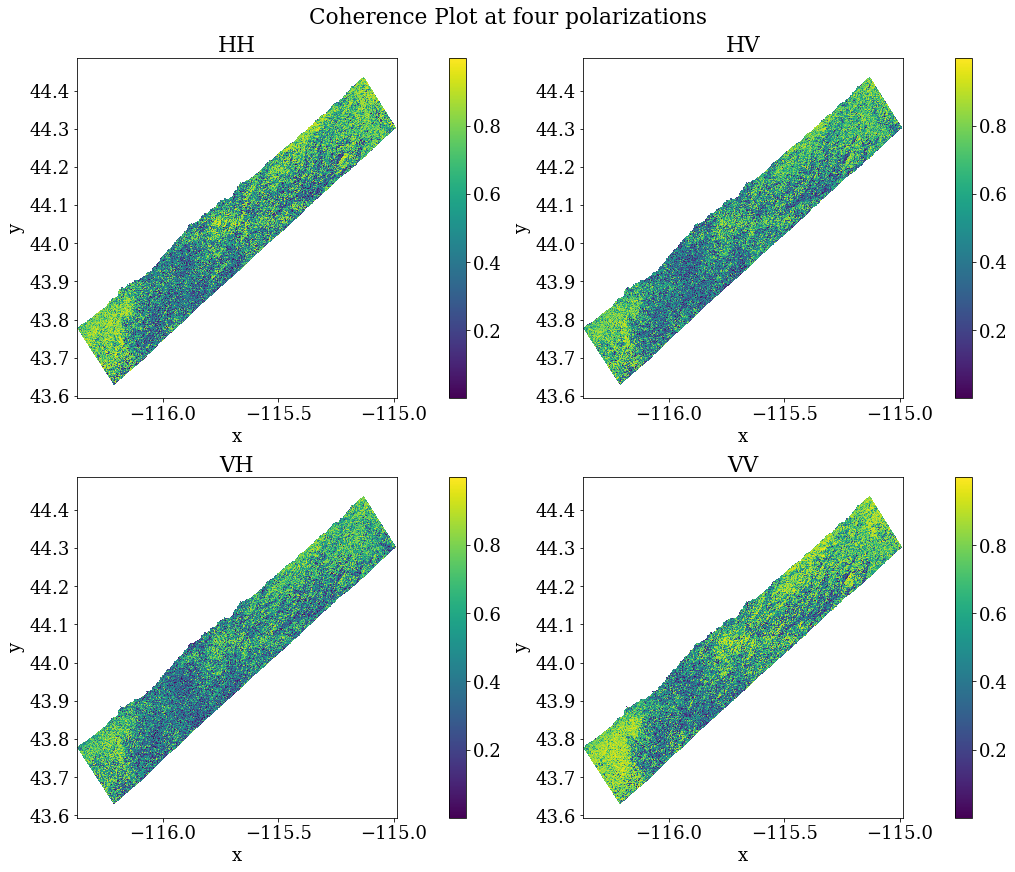

In [15]:
# Set font size and font family
plt.rcParams.update({'font.size': 18})
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

#Plot the coherence for each of the four polarizations (HH, HV, VH, VV)
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 12), constrained_layout=True)

coherence[0].plot(ax=axs[0, 0], cmap='viridis')
axs[0, 0].set_title('HH')

coherence[1].plot(ax=axs[0, 1], cmap='viridis')
axs[0, 1].set_title('HV')

coherence[2].plot(ax=axs[1, 0], cmap='viridis')
axs[1, 0].set_title('VH')

coherence[3].plot(ax=axs[1, 1], cmap='viridis')
axs[1, 1].set_title('VV')

fig.suptitle('Coherence Plot at four polarizations')

plt.show()


In [24]:
#The datatype is xarray.core.dataarray.DataArray
type(coherence[0])

xarray.core.dataarray.DataArray

In [26]:
coherence[0]

<xarray.DataArray (band: 1, y: 16054, x: 24954)>
[400611516 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -116.4 -116.4 -116.4 ... -115.0 -115.0 -115.0
  * y            (y) float64 44.49 44.49 44.49 44.49 ... 43.59 43.59 43.59 43.59
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

In [27]:
#Create a dataframe of start and end dates for each interferograms

int_dates = [[1, '01-15', '01-20'], 
            [2, '01-20', '01-27'], 
            [3, '01-27', '02-03'], 
            [4, '02-03', '02-10'], 
            [5, '02-03', '02-10'],
            [6, '02-10', '03-03'], 
            [7, '02-10', '03-03'], 
            [8, '03-03', '03-10'], 
            [9, '03-03', '03-10'],
            [10, '03-10', '03-16'], 
            [11, '03-10', '03-16'],
            [12, '03-10', '03-22'],
            [13, '03-10', '03-22']]


coh_df = pd.DataFrame(int_dates, columns= ['inteferograms', 'start_date', 'end_date']).set_index('inteferograms')

coh_df

,start_date,end_date
inteferograms,,
1,01-15,01-20
2,01-20,01-27
3,01-27,02-03
4,02-03,02-10
5,02-03,02-10
6,02-10,03-03
7,02-10,03-03
8,03-03,03-10
9,03-03,03-10


In [31]:
#Select all polarization coherence files
HH = glob.glob(data_path+'*HH_01.cor.grd.tiff')
HV = glob.glob(data_path+'*HV_01.cor.grd.tiff')
VH = glob.glob(data_path+'*VH_01.cor.grd.tiff')
VV = glob.glob(data_path+'*VV_01.cor.grd.tiff')

print('number of HH, HV, VH and VV coherence files are:', len(HH), len(HV), len(VH), len(VV))

number of HH, HV, VH and VV coherence files are: 13 13 13 13


In [32]:
#find the mean coherennce value of all polarizations for each inteferogram and put into the dataframe

pols = [HH, HV, VH, VV] #list of list of all polarization files
polss = ['HH', 'HV', 'VH', 'VV'] #list of polarization names to be used as df column names in the for loop
index = 0
for pol in pols: #4 iterations
    
    coh = []
    for i in pol: #13 iterations
        array = rxr.open_rasterio(i)
        coh.append(array) #13 coherence values

    coh_mean = [np.nanmean(x) for x in coh] #13 mean coherence values
    coh_df[polss[index]] = coh_mean #insert mean coherence values to the dataframe at right column
    index += 1 #increment index since we swithed to the next polarization
       


In [34]:
coh_df

,start_date,end_date,HH,HV,VH,VV
inteferograms,,,,,,
1,01-15,01-20,0.422095,0.405688,0.403272,0.433081
2,01-20,01-27,0.455021,0.432086,0.428093,0.470358
3,01-27,02-03,0.493507,0.482222,0.474969,0.509324
4,02-03,02-10,0.543575,0.524900,0.519152,0.573008
5,02-03,02-10,0.491251,0.489254,0.466791,0.515730
6,02-10,03-03,0.555057,0.533027,0.526111,0.580177
7,02-10,03-03,0.419322,0.411158,0.397261,0.438650
8,03-03,03-10,0.469886,0.440291,0.437024,0.490219
9,03-03,03-10,0.480259,0.440475,0.431209,0.496850


In [63]:
#find the date difference between the start and end dates for each interferogram
coh_df['days'] = (pd.to_datetime(coh_df['end_date'], format='%m-%d') - pd.to_datetime(coh_df['start_date'], format='%m-%d')).dt.days
coh_df

,start_date,end_date,HH,HV,VH,VV,days
inteferograms,,,,,,,
1,01-15,01-20,0.422095,0.405688,0.403272,0.433081,5
2,01-20,01-27,0.455021,0.432086,0.428093,0.470358,7
3,01-27,02-03,0.493507,0.482222,0.474969,0.509324,7
4,02-03,02-10,0.543575,0.524900,0.519152,0.573008,7
5,02-03,02-10,0.491251,0.489254,0.466791,0.515730,7
6,02-10,03-03,0.555057,0.533027,0.526111,0.580177,21
7,02-10,03-03,0.419322,0.411158,0.397261,0.438650,21
8,03-03,03-10,0.469886,0.440291,0.437024,0.490219,7
9,03-03,03-10,0.480259,0.440475,0.431209,0.496850,7


In [35]:
#save dataframe to csv
coh_df.to_csv('coherence_dataframe.csv')

In [56]:
# convert dataframe series to list
coh_df['days'].tolist()

[5, 7, 7, 7, 7, 21, 21, 7, 7, 6, 6, 12, 12]

# Plot the coherence df

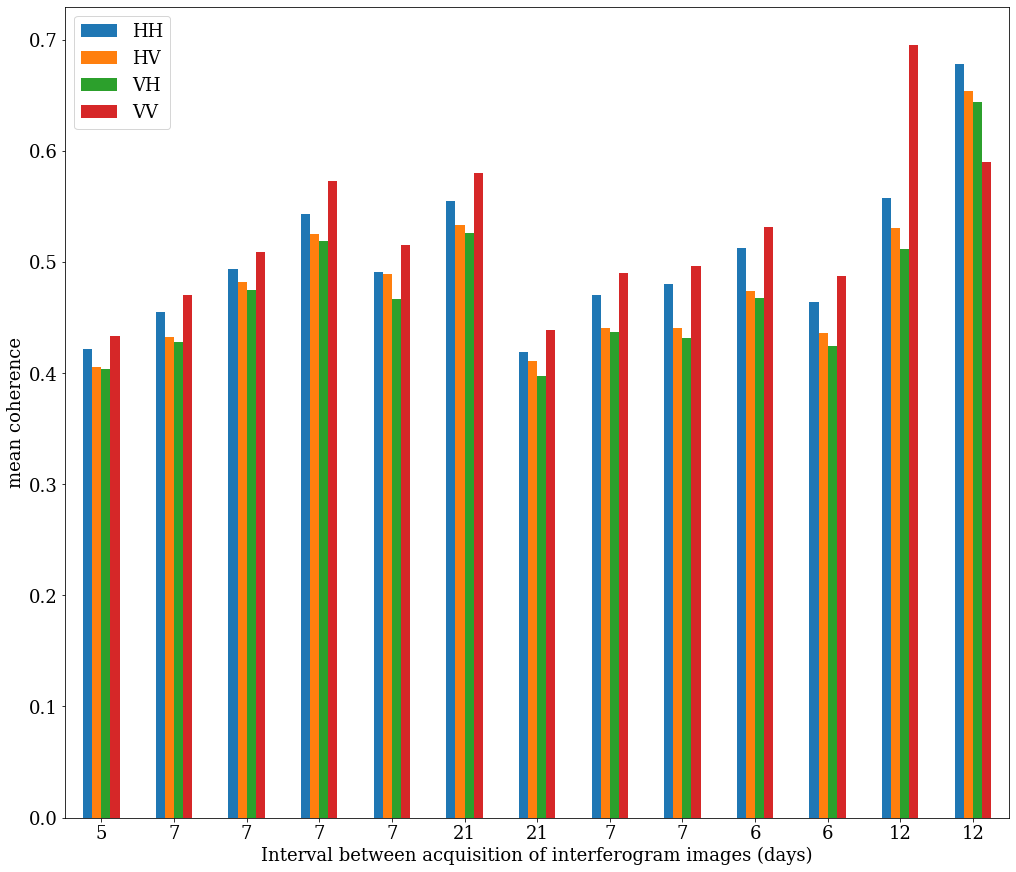

In [62]:
#create fig and axes objects
fig, ax = plt.subplots(figsize=(14, 12), constrained_layout=True)

coh_df.plot(kind='bar', y = ['HH', 'HV', 'VH', 'VV'], ax = ax, fontsize=18)

#set the x and y labels
ax.set_xlabel('Interval between acquisition of interferogram images (days)')
ax.set_ylabel('mean coherence')

#change the x ticks to the dates
ax.set_xticklabels(coh_df['days'].tolist(), rotation=0)

plt.show()